## Metadata (Data Dictionary)

| Variable | Data Type | Description |
|----------|-----------|-------------|
| dosage1 | float | Dosage of Medicine 1 |
| dosage2 | float | Dosage of Medicine 2 |
| proper | float | Whether the prescription is proper or not (0: No, 1: Yes) |

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Import data

In [2]:
df = pd.read_csv('dosage.csv')
df

,dosage1,dosage2,proper
0,7.344088,3.902811,0
1,5.858536,3.988410,1
2,6.070314,4.810033,0
3,6.137410,3.701340,1
4,4.719659,2.535914,0
...,...,...,...
495,5.352224,3.401088,1
496,6.076279,4.114156,1
497,5.938555,4.235227,1
498,6.098223,3.993164,1


# Data Exploration

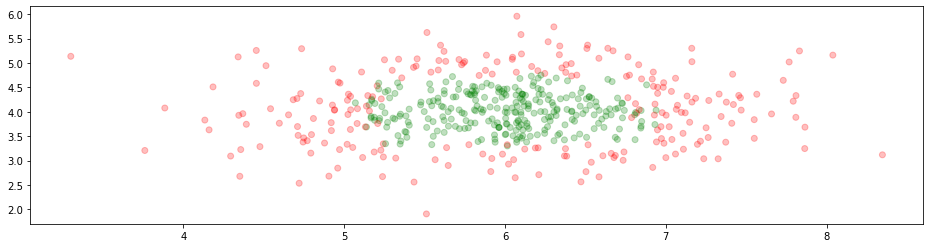

In [3]:
x = df['dosage1']
y = df['dosage2']
color = df['proper'].map({0: 'red', 1: 'green'})

plt.figure(figsize=(16, 4))
plt.scatter(x, y, color=color, alpha=0.25)
plt.show()

One of the assumptions in linear/logistic regression is monotonicity.<br>
It means, a feature should have a one-direction effect on the label.<br>
For linear regression, the label should tend to either increasing or decreasing.<br>
For logistic regression, the label should tend to be more towards one class.

However, we do not see that kind of relationship between "dosage1" and "proper" and between "dosage2" and "proper".<br>
The "proper=1" class is concentraded in the middle, not on one side.

### Attempt to use logistic regression
Although we know that, logistic regression should not do well on this data.<br>
But we can give it a try and see how bad it is.

In [4]:
x = df[['dosage1', 'dosage2']]
y = df['proper']

model = LogisticRegression()
model.fit(x, y)

yhat = model.predict(x)

metrics.confusion_matrix(y, yhat)

array([[  6, 221],
       [  0, 273]], dtype=int64)

From the confusion matrix, we can see that the model almost predict all samples as positive.

In [5]:
print('Accuracy =', (y == yhat).mean())

Accuracy = 0.558


How do we deal with this kind of data?<br>
Can we transform it into something monotonic?

# Data Transformation
Imagine, if we do not measure the distance between each data point to the centre of "proper=1" class, it should have a monotonic effect on the label.<br>
That means, if the distance is longer, the class should tend to be 1.

### Check the numeric summary (especially the mean)

In [6]:
df.describe()

,dosage1,dosage2,proper
count,500.000000,500.000000,500.000000
mean,6.018204,4.033066,0.546000
std,0.779971,0.607439,0.498378
min,3.299369,1.907029,0.000000
25%,5.520511,3.657179,0.000000
50%,6.061952,4.028599,1.000000
75%,6.518260,4.379202,1.000000
max,8.347191,5.957222,1.000000


### Measure the distance to the centre of "proper=1" on dosage1

In [7]:
dosage1_mean = df['dosage1'].mean()
dosage1_dist = (df['dosage1'] - dosage1_mean).abs()

dosage2_mean = df['dosage2'].mean()
dosage2_dist = (df['dosage2'] - dosage1_mean).abs()

### Plot "proper" against the "distance" in dosage1 and the "distance" in dosage2

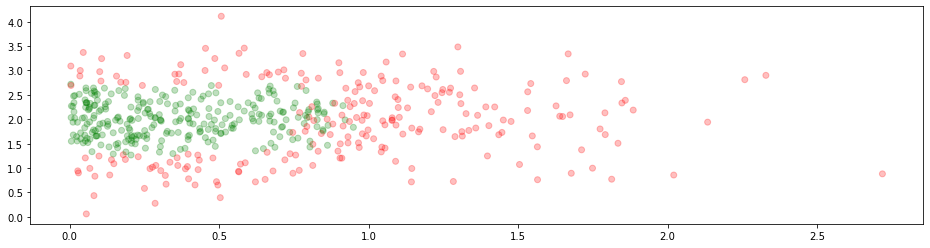

In [8]:
color = df['proper'].map({0: 'red', 1: 'green'})

plt.figure(figsize=(16, 4))
plt.scatter(dosage1_dist, dosage2_dist, color=color, alpha=0.25)
plt.show()

### Add the 2 new features into the DataFrame

In [9]:
df['dosage1_dist'] = dosage1_dist
df['dosage2_dist'] = dosage2_dist
df

,dosage1,dosage2,proper,dosage1_dist,dosage2_dist
0,7.344088,3.902811,0,1.325883,2.115393
1,5.858536,3.988410,1,0.159669,2.029795
2,6.070314,4.810033,0,0.052110,1.208171
3,6.137410,3.701340,1,0.119206,2.316865
4,4.719659,2.535914,0,1.298545,3.482291
...,...,...,...,...,...
495,5.352224,3.401088,1,0.665980,2.617117
496,6.076279,4.114156,1,0.058075,1.904049
497,5.938555,4.235227,1,0.079649,1.782978
498,6.098223,3.993164,1,0.080018,2.025041


### Rebuild the logistic regression model

In [10]:
x = df[['dosage1_dist', 'dosage2_dist']]
y = df['proper']

model = LogisticRegression()
model.fit(x, y)

yhat = model.predict(x)

metrics.confusion_matrix(y, yhat)

array([[157,  70],
       [ 49, 224]], dtype=int64)

In [11]:
print('Accuracy =', (y == yhat).mean())

Accuracy = 0.762


Now, we have a pretty good result.